In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [14]:
diabet = pd.read_csv('diabetes.csv')
diabet.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [20]:
diabet.size

6912

In [22]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

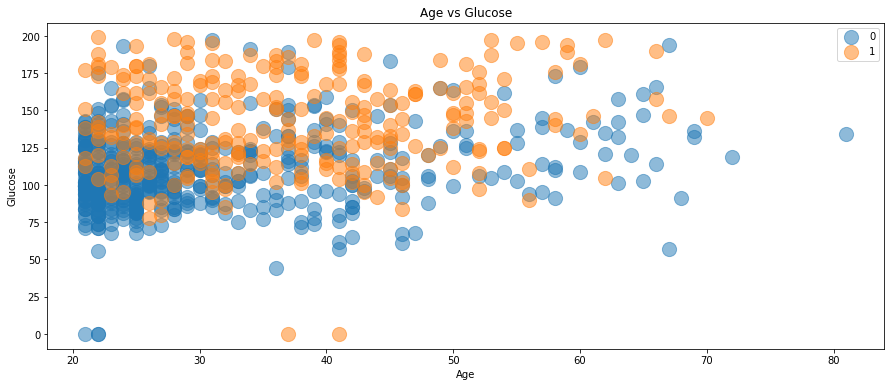

In [32]:
plt.figure(1 , figsize = (15 , 6))
for outcome in [ 0 , 1]:
    plt.scatter(x = 'Age' , y = 'Glucose' , data = diabet[diabet['Outcome'] == outcome] ,
                s = 200 , alpha = 0.5 , label = outcome)
plt.xlabel('Age'), plt.ylabel('Glucose') 
plt.title('Age vs Glucose')
plt.legend()
plt.show()

In [34]:
diabet_x = diabet[['Age' , 'Glucose']].iloc[: , :].values
inertia = []

for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 200  , algorithm='elkan') )
    kmeans.fit(diabet_x)
    inertia.append(kmeans.inertia_)


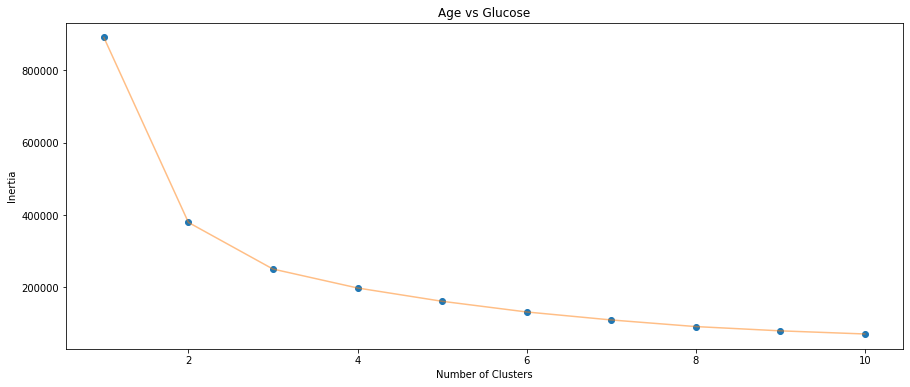

In [35]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('Age vs Glucose')
plt.show()

In [36]:
x_array =  np.array(diabet_x)
print(x_array)

[[ 50 148]
 [ 31  85]
 [ 32 183]
 ...
 [ 30 121]
 [ 47 126]
 [ 23  93]]


In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(x_array)
X

array([[ 1.4259954 ,  0.84832379],
       [-0.19067191, -1.12339636],
       [-0.10558415,  1.94372388],
       ...,
       [-0.27575966,  0.00330087],
       [ 1.17073215,  0.1597866 ],
       [-0.87137393, -0.8730192 ]])

In [38]:
kmeans = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 200  , algorithm='elkan') )

kmeans.fit(diabet_x)
centroid = kmeans.cluster_centers_
diabet["Cluster"] = kmeans.labels_
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,3
2,8,183,64,0,0,23.3,0.672,32,1,4
3,1,89,66,23,94,28.1,0.167,21,0,3
4,0,137,40,35,168,43.1,2.288,33,1,1


In [39]:
kmeans.labels_

array([1, 3, 4, 3, 1, 0, 3, 0, 4, 0, 0, 4, 1, 4, 4, 3, 0, 0, 0, 0, 0, 3,
       4, 0, 1, 0, 1, 3, 1, 0, 0, 1, 3, 3, 0, 0, 1, 0, 3, 0, 4, 1, 0, 4,
       1, 4, 1, 3, 0, 0, 3, 3, 3, 4, 1, 3, 4, 3, 1, 0, 3, 1, 2, 1, 0, 3,
       0, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 0, 0, 0, 3, 3, 3, 1, 0, 0, 3,
       1, 0, 3, 0, 3, 1, 1, 1, 3, 3, 3, 0, 4, 1, 0, 3, 3, 0, 3, 1, 3, 3,
       4, 1, 3, 3, 1, 1, 0, 3, 3, 3, 4, 0, 0, 1, 0, 3, 0, 0, 0, 0, 4, 0,
       4, 3, 3, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 3, 3, 0, 1, 3, 1, 0, 1, 1,
       4, 1, 3, 0, 3, 4, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 3, 3, 4,
       3, 0, 1, 1, 3, 0, 2, 3, 1, 4, 4, 0, 0, 1, 0, 0, 1, 1, 3, 1, 0, 0,
       0, 1, 0, 1, 0, 3, 0, 0, 4, 4, 3, 4, 3, 1, 4, 1, 0, 1, 0, 0, 3, 0,
       4, 1, 0, 1, 3, 3, 3, 4, 4, 0, 1, 1, 3, 0, 3, 4, 4, 4, 4, 0, 3, 3,
       1, 0, 1, 4, 0, 4, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 4, 1, 4, 1, 3, 1,
       0, 3, 1, 0, 3, 1, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 1, 4, 0, 1,
       1, 0, 3, 0, 3, 0, 0, 0, 4, 1, 1, 0, 3, 0, 4,

In [41]:
h = 0.02
x_min, x_max = diabet_x[:, 0].min() - 1, diabet_x[:, 0].max() + 1
y_min, y_max = diabet_x[:, 1].min() - 1, diabet_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

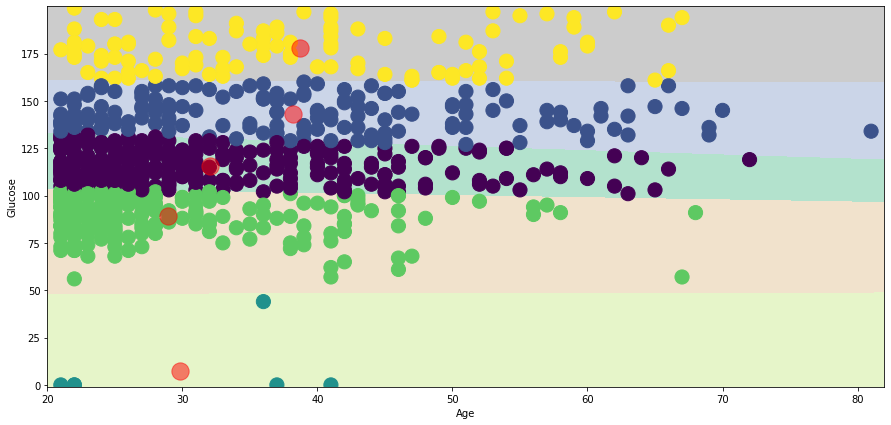

In [44]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Glucose' , data = diabet , c = diabet["Cluster"] , s = 200 )
plt.scatter(x = centroid[: , 0] , y =  centroid[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Glucose') , plt.xlabel('Age')
plt.show()

In [47]:
score = silhouette_score(X, kmeans.labels_, metric="euclidean")

score

0.1992319345395124

In [48]:
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

scaler = StandardScaler()
X = scaler.fit_transform(x_array)
X

array([[ 1.4259954 ,  0.84832379],
       [-0.19067191, -1.12339636],
       [-0.10558415,  1.94372388],
       ...,
       [-0.27575966,  0.00330087],
       [ 1.17073215,  0.1597866 ],
       [-0.87137393, -0.8730192 ]])

In [49]:
ahc = AgglomerativeClustering(n_clusters =  4, linkage='single')
ahc.fit(X)
ahc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
dist_matrix = distance_matrix(X,X)
dist_matrix

array([[0.        , 2.54976343, 1.88298627, ..., 1.90000896, 0.73433154,
        2.87070158],
       [2.54976343, 0.        , 3.06830026, ..., 1.12990556, 1.87082321,
        0.72528889],
       [1.88298627, 3.06830026, 0.        , ..., 1.94787093, 2.19349391,
        2.91898536],
       ...,
       [1.90000896, 1.12990556, 1.94787093, ..., 0.        , 1.45493172,
        1.05957219],
       [0.73433154, 1.87082321, 2.19349391, ..., 1.45493172, 0.        ,
        2.28842414],
       [2.87070158, 0.72528889, 2.91898536, ..., 1.05957219, 2.28842414,
        0.        ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



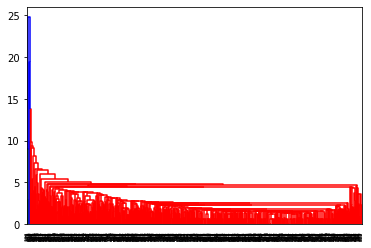

In [51]:
Z =  hierarchy.linkage(dist_matrix, 'single')
dendrogram = hierarchy.dendrogram(Z)

In [52]:
clusters = fcluster(Z, 4, criterion='maxclust')
metrics.silhouette_score(X,clusters)

0.4468410259784245

In [53]:
ahc = AgglomerativeClustering(n_clusters =  4, linkage='complete')
ahc.fit(X)
ahc.labels_

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



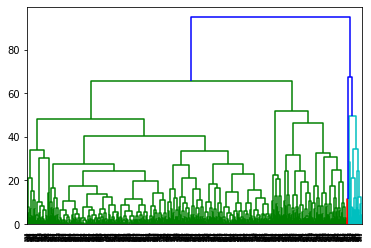

In [54]:
Zc = hierarchy.linkage(dist_matrix, 'complete')
dendrogram = hierarchy.dendrogram(Zc)

In [55]:
clusters = fcluster(Zc, 4, criterion='maxclust')
metrics.silhouette_score(X,clusters)

0.3966235575002126

In [56]:
ahc = AgglomerativeClustering(n_clusters =  4, linkage='average')
ahc.fit(X)
ahc.labels_

array([3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 0,
       2, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 2, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       2, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



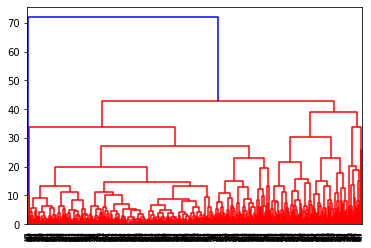

In [57]:
Zav = hierarchy.linkage(dist_matrix, 'average')
dendrogram = hierarchy.dendrogram(Zav)

In [58]:
clusters = fcluster(Zav, 4, criterion='maxclust')
metrics.silhouette_score(X,clusters)

0.39040285067630326